<a href="https://colab.research.google.com/github/karkakol/fashion_mnist/blob/main/Kopia_notatnika_Z12_D_FashionMINT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
from tensorflow import keras
print(tf.__version__)

print(keras.__version__)

2.12.0
2.12.0


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os

In [ ]:
fashion_mnist = keras.datasets.fashion_mnist
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


In [ ]:
X_train_full.shape

(60000, 28, 28)

Each pixel intensity is represented as a byte (0 to 255):

In [ ]:
X_train_full.dtype

dtype('uint8')

* Podzielmy pełny zestaw treningowy na zestaw walidacyjny i zestaw treningowy.
* Kolor pikseli skalujemy również do zakresu 0-1 i przekształcamy na zmiennoprzecinkowe, dzieląc przez 255.

In [ ]:
X_valid, X_train = X_train_full[:5000] / 255., X_train_full[5000:] / 255.
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]
X_test = X_test / 255.

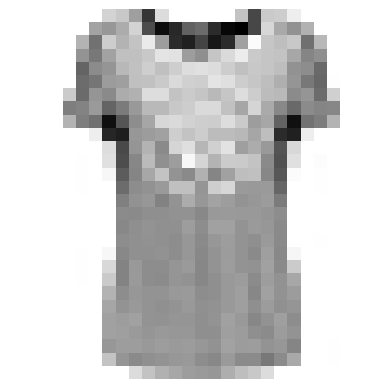

In [ ]:
plt.imshow(X_train[1], cmap="binary")
plt.axis('off')
plt.show()

In [ ]:
y_train

array([4, 0, 7, ..., 3, 0, 5], dtype=uint8)

Będziemy używać klas numerycznych i nazw.

In [ ]:
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
               "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

class_names[y_train[0]]

'Coat'

Możemy narysować więcej przykładów treningowych.

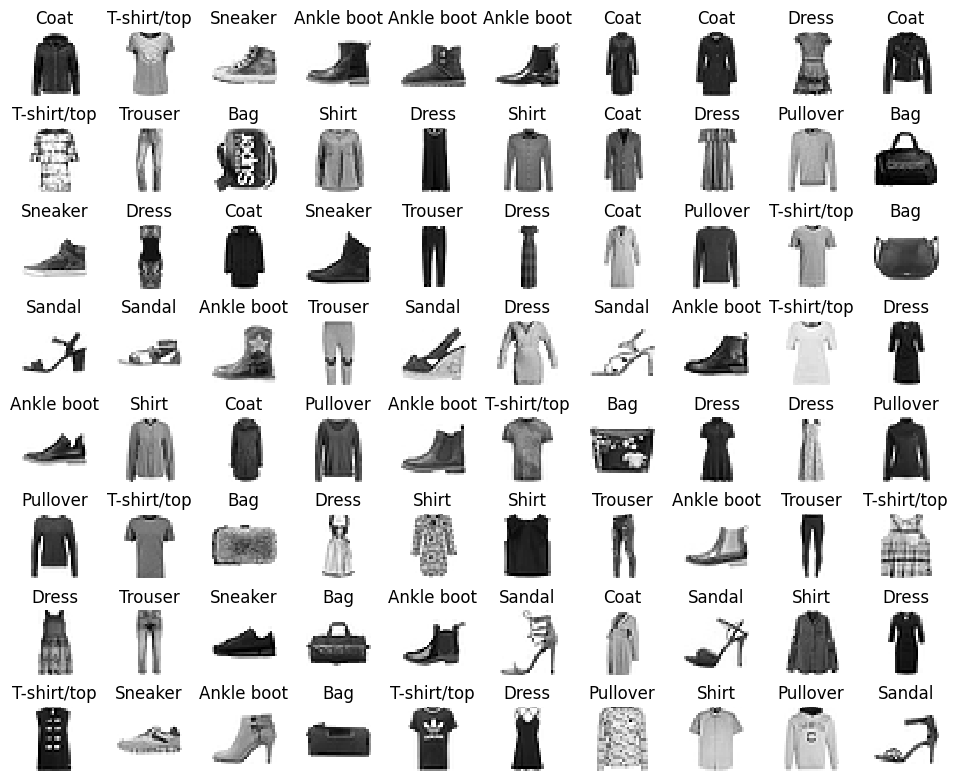

In [ ]:
n_rows = 8
n_cols = 10
plt.figure(figsize=(n_cols * 1.2, n_rows * 1.2))
for row in range(n_rows):
    for col in range(n_cols):
        index = n_cols * row + col
        plt.subplot(n_rows, n_cols, index + 1)
        plt.imshow(X_train[index], cmap="binary", interpolation="nearest")
        plt.axis('off')
        plt.title(class_names[y_train[index]], fontsize=12)
plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.show()

# Zad.
Porównaj wyniki architektury fully connected (najlepszej jaką uda ci się zbudować) i architektury konwolucyjnej (najlepszej jaką uda ci się zbudować).


Wizualizuj wyniki:

* porównaj krzywe uczenia


In [ ]:
from keras.models import Sequential
from keras.layers import Dense
from keras.callbacks import LearningRateScheduler
from keras.callbacks import ModelCheckpoint
from keras.callbacks import EarlyStopping
from keras.layers import Dropout
from keras.layers import BatchNormalization
from keras.layers import Activation
from keras.layers import Flatten
from keras.layers.convolutional import Conv2D, MaxPooling2D, AveragePooling2D
from keras.callbacks import History
from keras.optimizers import Adam

In [ ]:
keras.backend.clear_session()
np.random.seed(420)
tf.random.set_seed(420)

history_conv = History()

model_conv = Sequential()
model_conv.add(Conv2D(32, (3, 3), padding='same', activation='relu', input_shape=(28, 28, 1)))
model_conv.add(AveragePooling2D(pool_size=(2, 2)))
model_conv.add(Conv2D(32, 3,  activation='relu'))
model_conv.add(AveragePooling2D(pool_size=(2, 2)))
model_conv.add(Conv2D(64, 3, activation='relu'))
model_conv.add(AveragePooling2D(pool_size=(2, 2)))
model_conv.add(Flatten())
model_conv.add(Dense(800))
model_conv.add(BatchNormalization())
model_conv.add(Activation("relu"))
model_conv.add(Dropout(0.25))
model_conv.add(Dense(300))
model_conv.add(BatchNormalization())
model_conv.add(Activation("relu"))
model_conv.add(Dropout(0.25))
model_conv.add(Dense(100))
model_conv.add(BatchNormalization())
model_conv.add(Activation("relu"))
model_conv.add(Dropout(0.25))
model_conv.add(Dense(50))
model_conv.add(BatchNormalization())
model_conv.add(Activation("relu"))
model_conv.add(Dropout(0.25))
model_conv.add(Dense(10, activation="softmax"))

model_conv.summary()
early_stopping_conv = EarlyStopping(patience=10,monitor="val_loss",restore_best_weights=True)
model_conv.compile(loss="sparse_categorical_crossentropy",optimizer=Adam(learning_rate=0.001),metrics=["accuracy"])
model_conv.fit(X_train, y_train, validation_data=(X_valid, y_valid),epochs=100,callbacks=[early_stopping_conv, history_conv])
model_conv.evaluate(X_test,y_test)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 32)        320       
                                                                 
 average_pooling2d (AverageP  (None, 14, 14, 32)       0         
 ooling2D)                                                       
                                                                 
 conv2d_1 (Conv2D)           (None, 12, 12, 32)        9248      
                                                                 
 average_pooling2d_1 (Averag  (None, 6, 6, 32)         0         
 ePooling2D)                                                     
                                                                 
 conv2d_2 (Conv2D)           (None, 4, 4, 64)          18496     
                                                                 
 average_pooling2d_2 (Averag  (None, 2, 2, 64)         0

[0.22238066792488098, 0.921999990940094]

In [ ]:
history = History()
model = Sequential()
model.add(Flatten(input_shape=(28,28,1)))
model.add(Activation('relu'))
model.add(Dense(784))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Activation('relu'))
model.add(Dense(400))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Activation('relu'))
model.add(Dense(200))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Activation('relu'))
model.add(Dense(100))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Activation('relu'))
model.add(Dense(50))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Activation('relu'))
model.add(Dense(10, activation="softmax"))

model.summary()
early_stopping = EarlyStopping(patience=30,monitor="val_loss")
model.compile(loss="sparse_categorical_crossentropy",optimizer="adam",metrics=["accuracy"])
model.fit(X_train, y_train, validation_data=(X_valid, y_valid),epochs=100,callbacks=[early_stopping, history])
model.evaluate(X_test,y_test)

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_6 (Flatten)         (None, 784)               0         
                                                                 
 activation_28 (Activation)  (None, 784)               0         
                                                                 
 dense_31 (Dense)            (None, 784)               615440    
                                                                 
 batch_normalization_25 (Bat  (None, 784)              3136      
 chNormalization)                                                
                                                                 
 dropout_25 (Dropout)        (None, 784)               0         
                                                                 
 activation_29 (Activation)  (None, 784)               0         
                                                      

[0.3031283915042877, 0.9024999737739563]

In [ ]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.3287 - accuracy: 0.8932


[0.328696072101593, 0.8931999802589417]

In [ ]:
import matplotlib.pyplot as plt
plt.plot(history.history['categorical_accuracy'], label = "train batch dropout ")
plt.plot(history.history['val_categorical_accuracy'], label = "test batch dropout ")

plt.legend()
plt.show()

NameError: ignored